In [9]:
# Read data
import pandas as pd

data = pd.read_csv('spam.csv', delimiter=',', encoding='latin-1')

data.head(n=10)

X = data['Text'].values
Y = data['Label'].values


In [10]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [11]:
# transform data to feature vectors while removing stop words & words that appear only once

from sklearn.feature_extraction.text import TfidfVectorizer

features = TfidfVectorizer(min_df=1, stop_words='english')
X_train = features.fit_transform(X_train)
X_test = features.transform(X_test)


In [12]:
# train the model using Decision Tree Classifier
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, Y_train)
model.score(X_train, Y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

         ham       0.97      0.98      0.98       949
        spam       0.89      0.84      0.86       166

    accuracy                           0.96      1115
   macro avg       0.93      0.91      0.92      1115
weighted avg       0.96      0.96      0.96      1115

Accuracy:  96.05381165919282


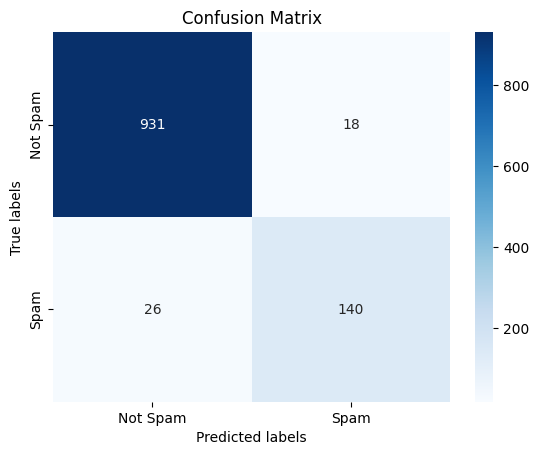

In [13]:
# test accuracy of model
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn import metrics

print(classification_report(Y_test, y_pred))
print("Accuracy: ", metrics.accuracy_score(Y_test,y_pred)*100)

ax = plt.subplot()
sns.heatmap(confusion_matrix(Y_test,y_pred), annot=True, ax = ax,cmap='Blues',fmt='');

ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted labels');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']);
ax.set_ylabel('True labels');
ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

In [15]:
# test our model with new data
new_data = ["Congrats!, you've just won 1,000$ Amazon Gift Card please click on the link here: http://bit.ly/123456", "Hey, i'm going to bed!!"]
new_data = features.transform(new_data)
new_data_pred = model.predict(new_data)
print(new_data_pred)

['ham' 'ham']
